In [67]:
import pandas as pd
import missingno as msno
import seaborn as sns
import re
# import nltk
import random
%matplotlib inline
import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk import bigrams, trigrams
# from nltk.probability import FreqDist
# from nltk.stem import PorterStemmer, WordNetLemmatizer

In [68]:
df1 = pd.read_excel('DDS9_Data_Extract_with_labels.xlsx')

In [69]:
df2 = pd.read_excel('DDS10_Data_Extract_with_labels.xlsx')

In [70]:
df3 = pd.read_excel('DDS11_Data_Extract_with_labels.xlsx')

### Common columns across all 3 datasets

In [71]:
df1cols = set(df1.columns)
df2cols = set(df2.columns)
df3cols = set(df3.columns)
common_cols = list(df1cols.intersection(df2cols).intersection(df3cols))
print(len(common_cols))

109


### Concatenated dataset for the common columns

In [72]:
merged_df = df1[common_cols]._append(df2[common_cols], ignore_index=True)._append(df3[common_cols], ignore_index=True)
merged_df

,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player",QNEW2 - How old are the children in your home?-14-18 years,QNEW2 - How old are the children in your home?-0-4 years,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q36r3 - Landline telephone - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television",Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital),Q73r13 - Play video games - Which are things you typically do while watching your home television system?,...,Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?,"Q37r8 - Listening to the radio (any format and/or device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec",QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer","Q36r4 - Mobile voice - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to ra",Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q26 - Which of the following subscriptions does your household purchase?-Landline telephone,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?,"QNEW19r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch movies, how frequently do you do each of the following?"
0,Yes,No,NaN,NaN,No,-1,NaN,No,No,Almost always (greater than 75% of the time),...,Almost always (greater than 75% of the time),3.0,No,50,No,NaN,No,No,Almost always (greater than 75% of the time),Occasionally (monthly)
1,Yes,No,No,Yes,No,98,NaN,No,No,Frequently (between 50% and 75% of the time),...,Frequently (between 50% and 75% of the time),NaN,Yes,4,No,NaN,No,No,Frequently (between 50% and 75% of the time),Occasionally (monthly)
2,No,No,NaN,NaN,No,85,NaN,No,No,Frequently (between 50% and 75% of the time),...,Frequently (between 50% and 75% of the time),NaN,No,30,No,NaN,Yes,No,Frequently (between 50% and 75% of the time),Occasionally (monthly)
3,No,No,NaN,NaN,No,99,NaN,No,Yes,Almost never,...,Almost never,NaN,No,30,No,NaN,No,Yes,Almost never,Rarely (one to three times a year)
4,No,No,NaN,NaN,No,-1,NaN,No,No,Almost always (greater than 75% of the time),...,Rarely (10%-50% of the time),1.0,No,50,No,NaN,No,No,Rarely (10%-50% of the time),Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,No,No,Yes,No,Yes,30,NaN,No,No,Always (close to 100% of the t

In [73]:
dfs = [df1, df2, df3]

In [74]:
demographics = [
    'age - you are...',
    'QNEW3 - What is your employment status?',
    'Q5 - Which category best describes your ethnicity?',
    'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.',
]
x_labels_demographics = ['Age', 'Employment Status', 'Ethnicity', 'Annual Household Income']

In [75]:
tv_cols = [
    'QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?',
    
]
x_labels_tv = ['Binge Watchers']

In [76]:
streaming_cols = [
    'QNEW28 - How frequently do you use a friend or family member\'s (someone not living in your household) subscription login information  to watch digital content?',
    
]
x_labels_streaming = ['Subscription Sharing']

In [77]:
news_cols = [
    'Q89 - Which of the following is your most frequently used mechanism to get news?',
    
]
x_labels_news = ['News Source']

In [78]:
def create_histogram(df, column, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=100, edgecolor='black') #Using edge color to distinguish different columns
    plt.title(title)
    plt.xlabel(x_label)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(y_label)
    plt.show()

-------------------------------------
DEMOGRAPHIC ANALYSIS OF Dataset 1
-------------------------------------


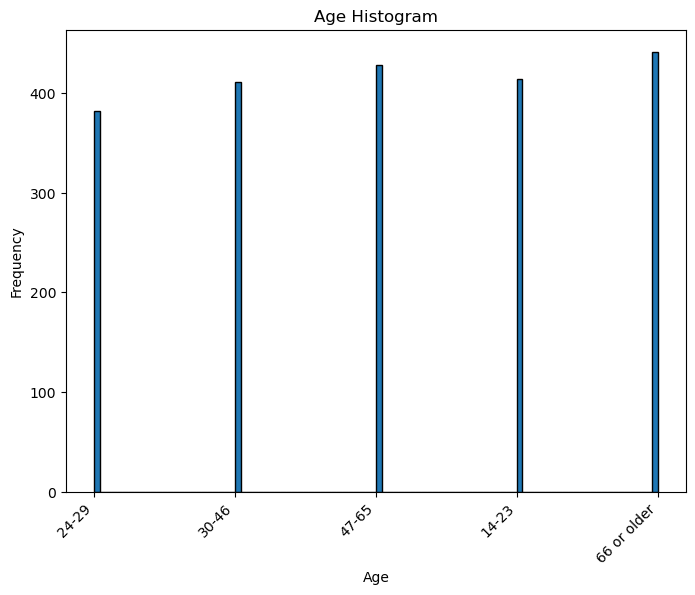

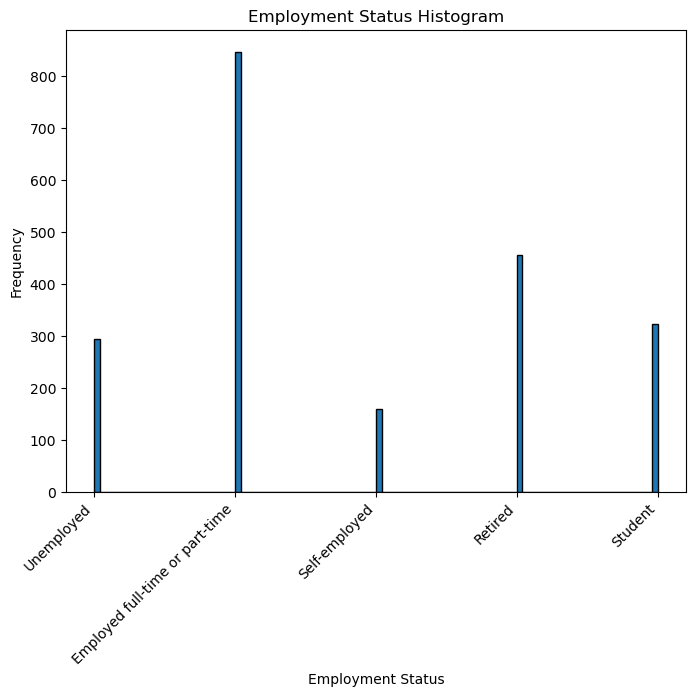

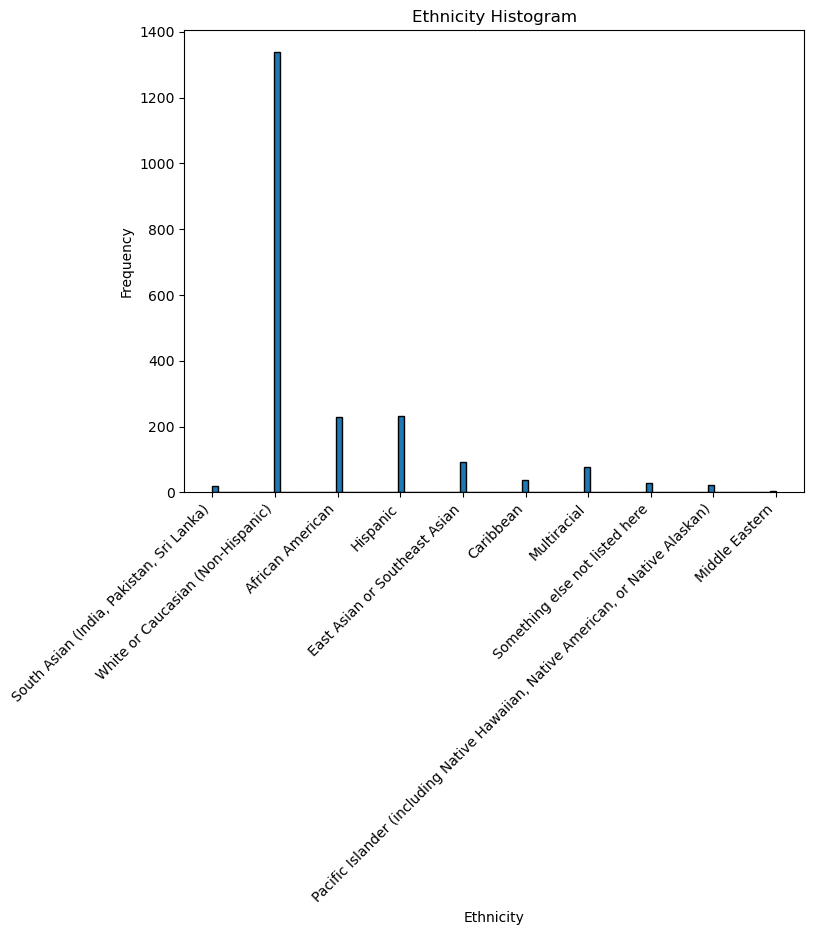

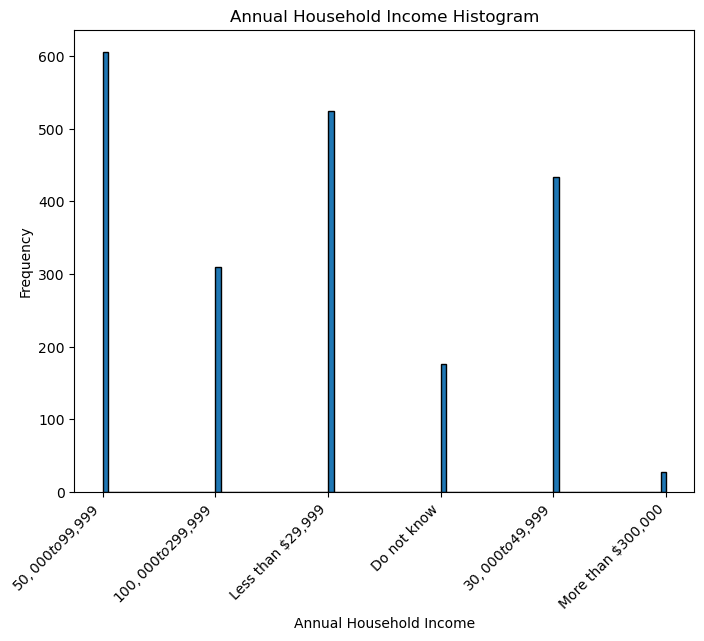

-------------------------------------
DEMOGRAPHIC ANALYSIS OF Dataset 2
-------------------------------------


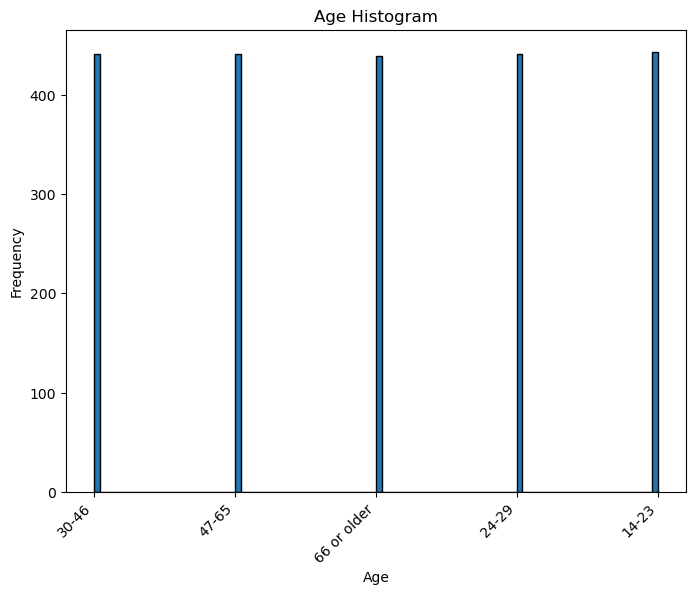

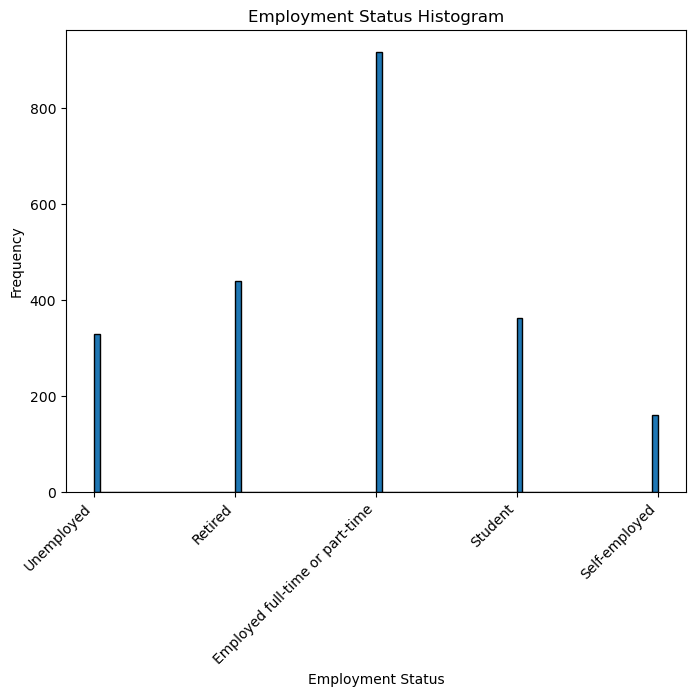

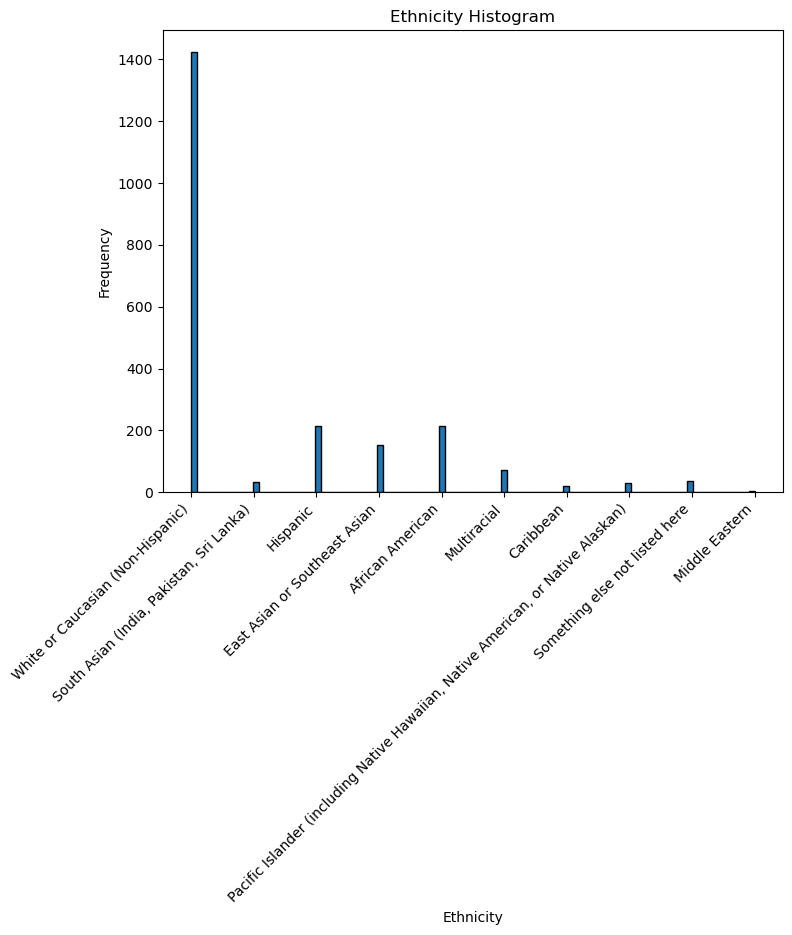

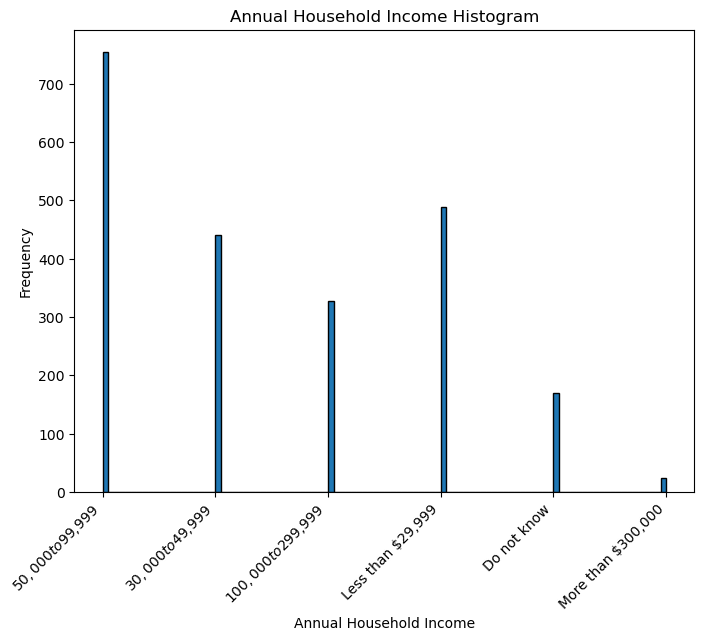

-------------------------------------
DEMOGRAPHIC ANALYSIS OF Dataset 3
-------------------------------------


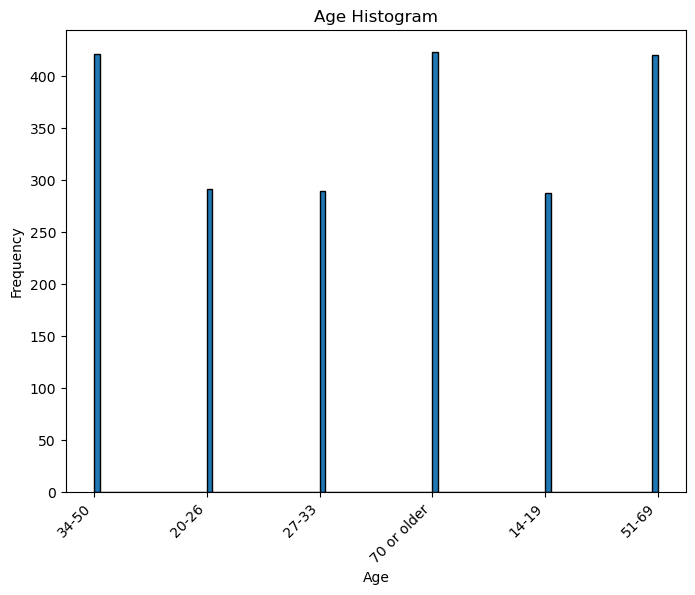

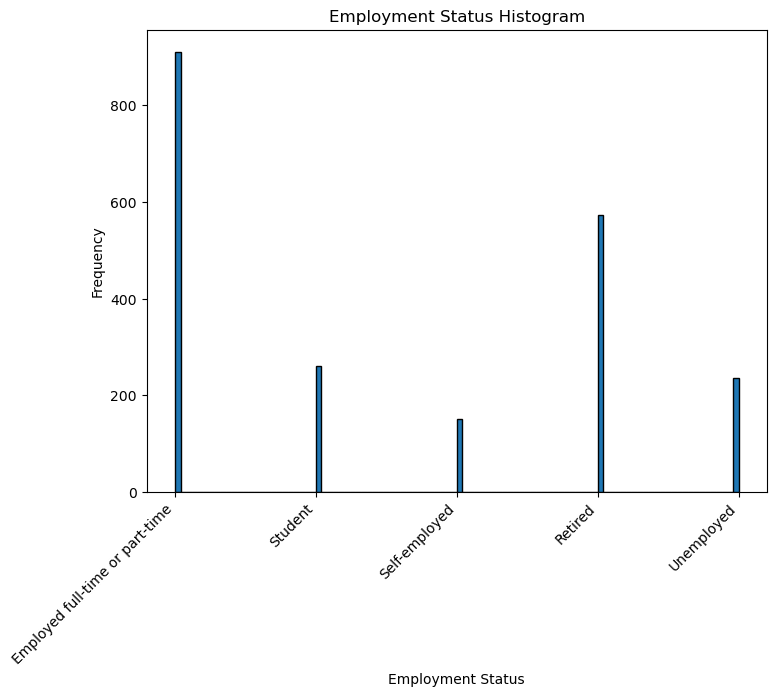

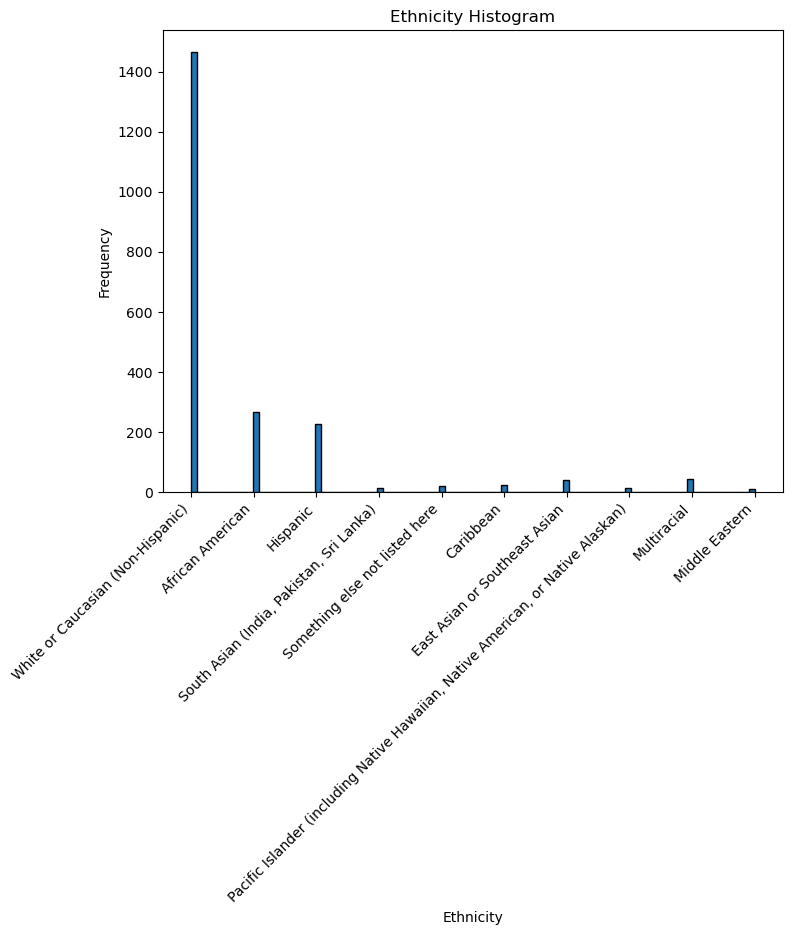

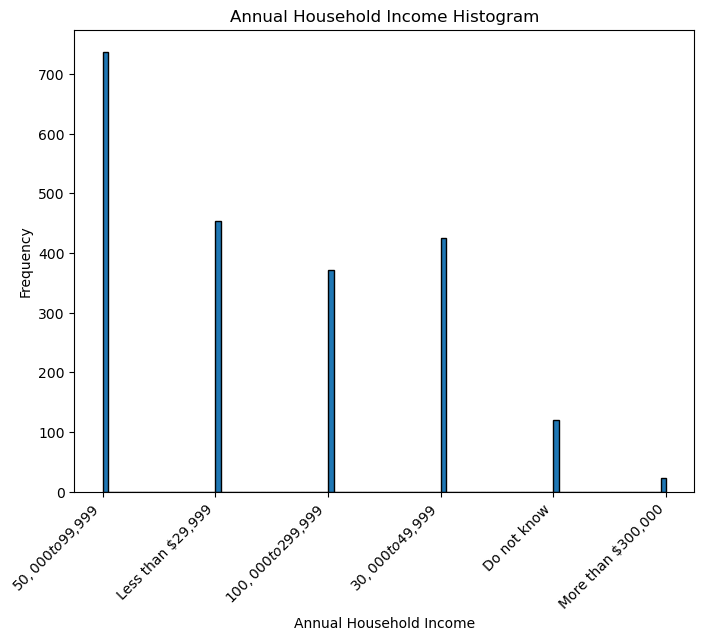

In [79]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("DEMOGRAPHIC ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    for i in range(len(demographics)):
        create_histogram(dfs[df_num], demographics[i], x_labels_demographics[i] + ' Histogram', x_labels_demographics[i], 'Frequency')

### We can see from the above plots that the demographic distribution of the survey-takers for all the 3 datasets is similar.

-------------------------------------
Binge Watchers ANALYSIS OF Dataset 1
-------------------------------------


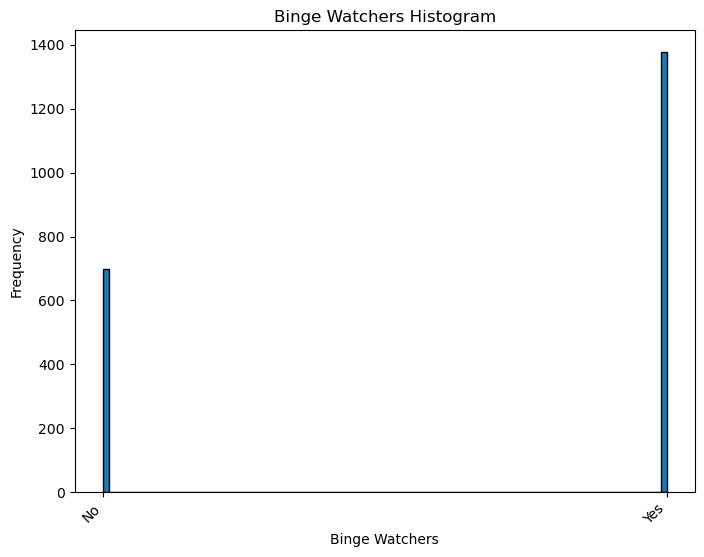

-------------------------------------
Binge Watchers ANALYSIS OF Dataset 2
-------------------------------------


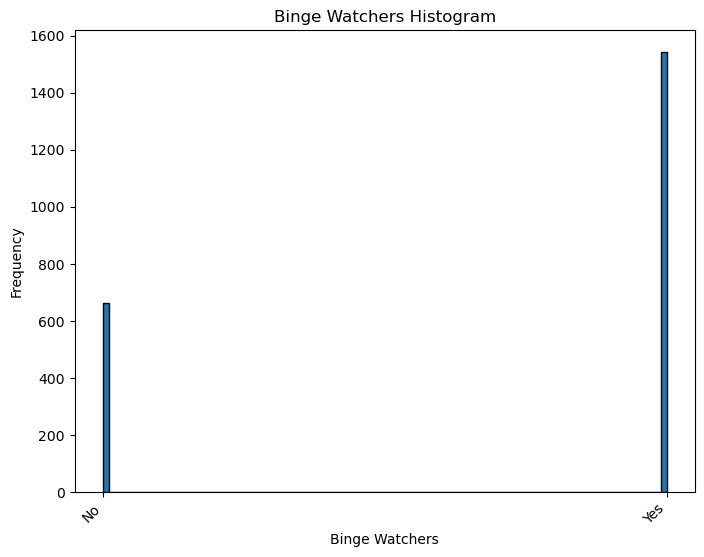

-------------------------------------
Binge Watchers ANALYSIS OF Dataset 3
-------------------------------------


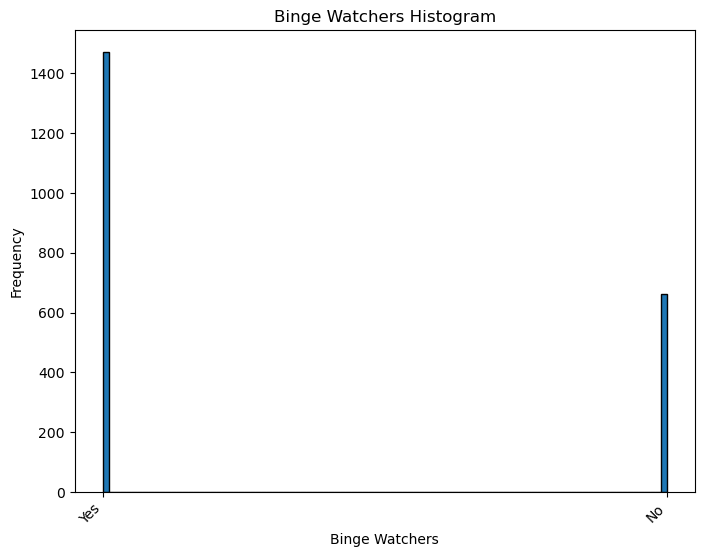

In [80]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("Binge Watchers ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    for i in range(len(tv_cols)):
        create_histogram(dfs[df_num], tv_cols[i], x_labels_tv[i] + ' Histogram', x_labels_tv[i], 'Frequency')

### Binge Watching habits above

-------------------------------------
Streaming ANALYSIS OF Dataset 1
-------------------------------------


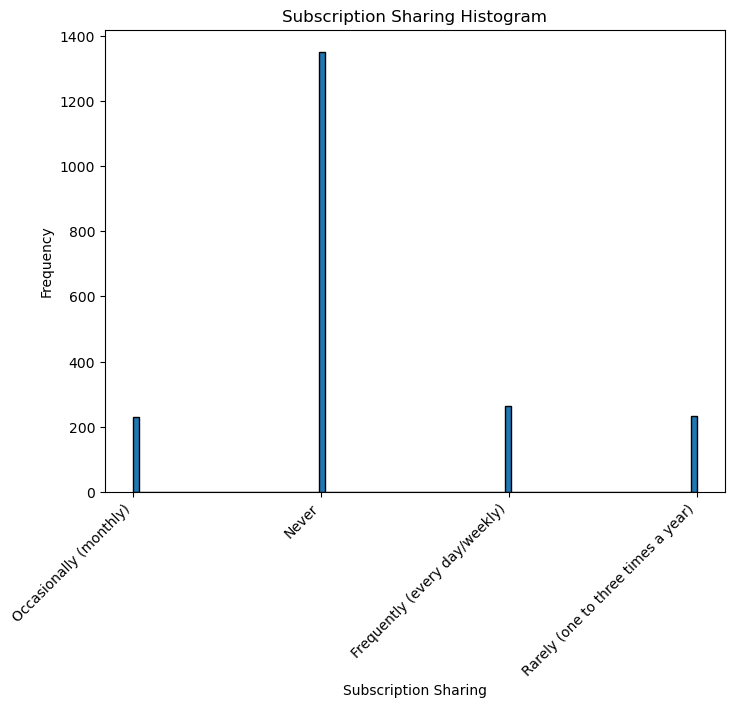

-------------------------------------
Streaming ANALYSIS OF Dataset 2
-------------------------------------
-------------------------------------
DATA IS MISSING
-------------------------------------
-------------------------------------
Streaming ANALYSIS OF Dataset 3
-------------------------------------


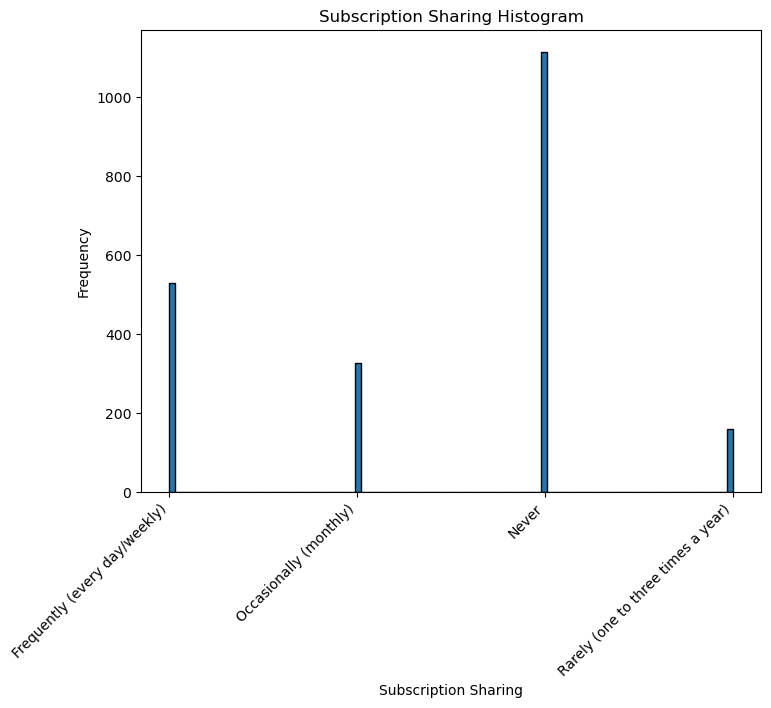

In [81]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("Streaming ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    if df_num == 1:
        print("-------------------------------------")
        print("DATA IS MISSING")
        print("-------------------------------------")
        continue
    for i in range(len(streaming_cols)):
        create_histogram(dfs[df_num], streaming_cols[i], x_labels_streaming[i] + ' Histogram', x_labels_streaming[i], 'Frequency')

### People do not usually share subscriptions

-------------------------------------
News ANALYSIS OF Dataset 1
-------------------------------------


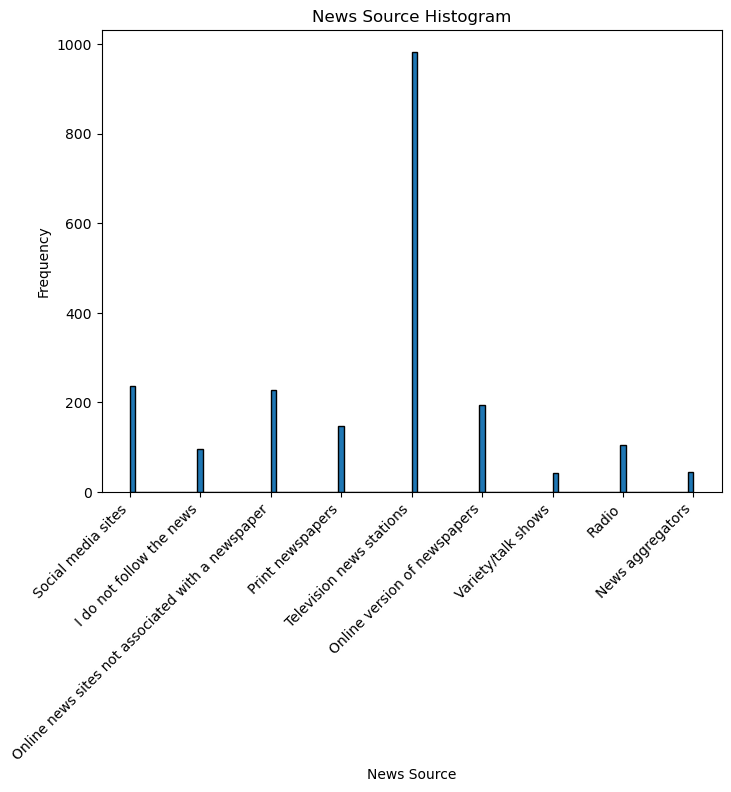

-------------------------------------
News ANALYSIS OF Dataset 2
-------------------------------------


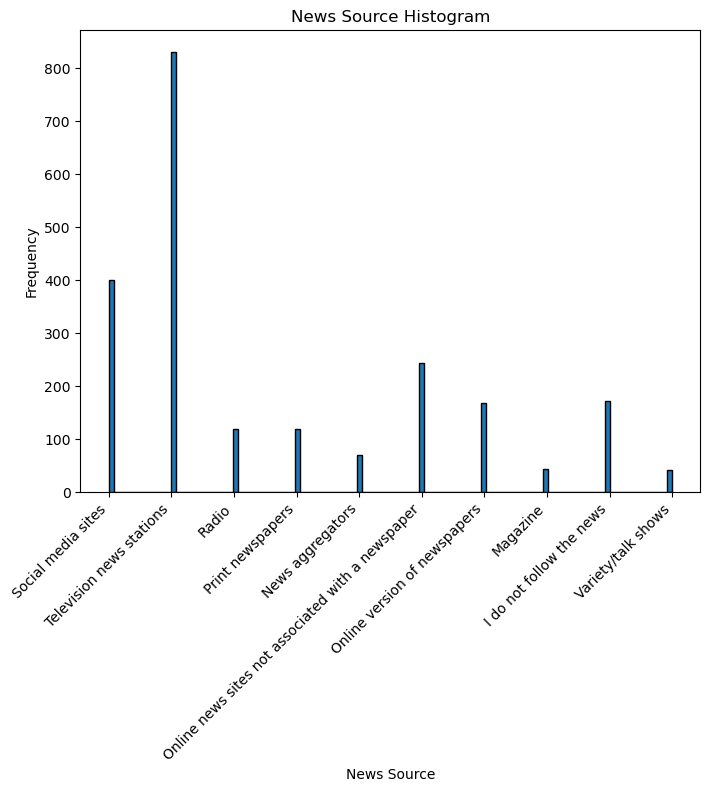

-------------------------------------
News ANALYSIS OF Dataset 3
-------------------------------------


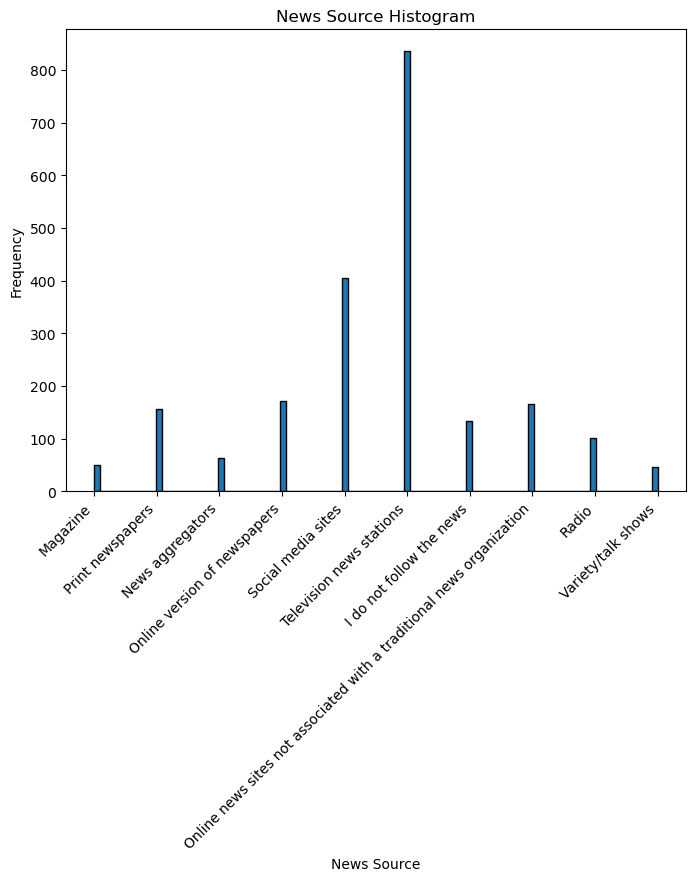

In [82]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("News ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    for i in range(len(news_cols)):
        create_histogram(dfs[df_num], news_cols[i], x_labels_news[i] + ' Histogram', x_labels_news[i], 'Frequency')

### TV News stations are the most popular news source, social media sites have doubled for datasets 2 and 3?

# Same analysis on the combined dataset

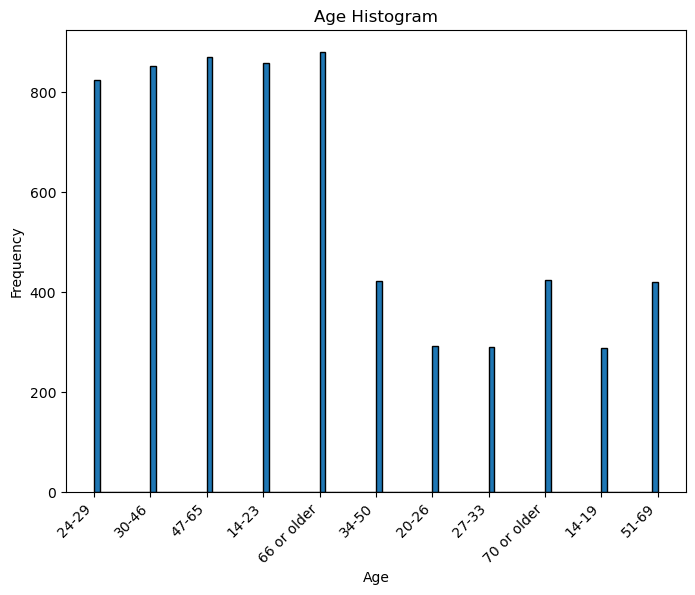

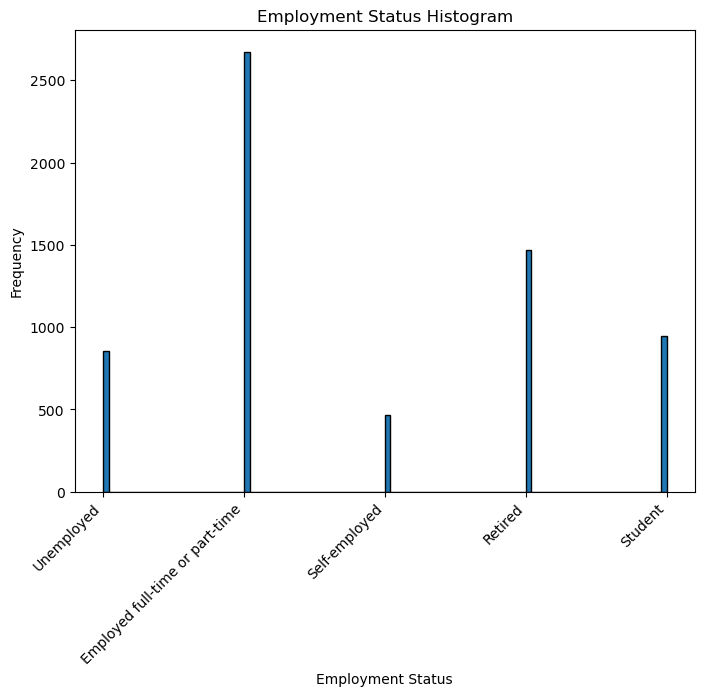

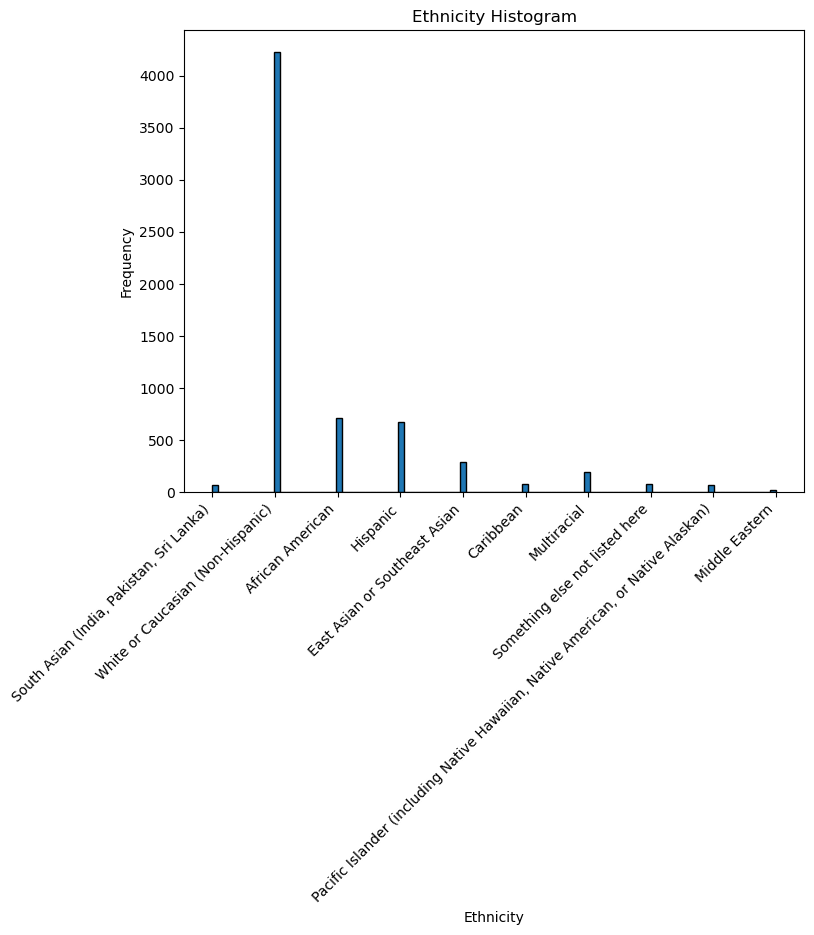

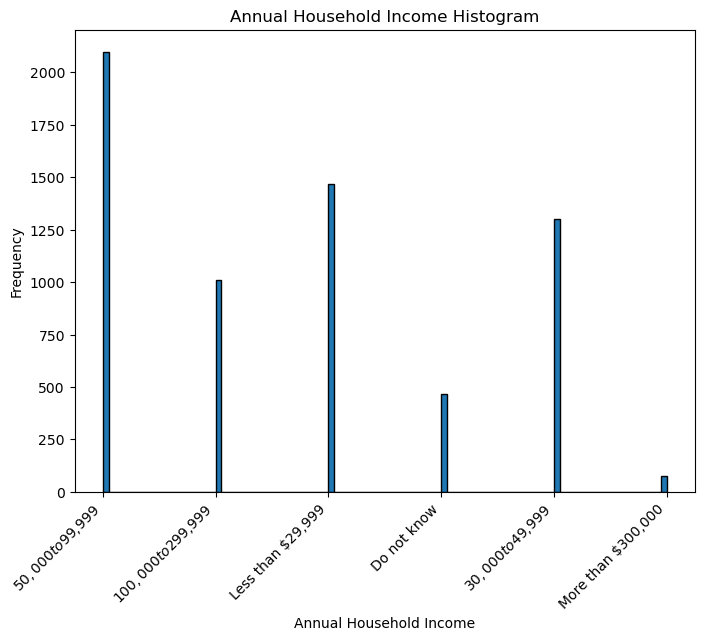

In [83]:
for i in range(len(demographics)):
        create_histogram(merged_df, demographics[i], x_labels_demographics[i] + ' Histogram', x_labels_demographics[i], 'Frequency')

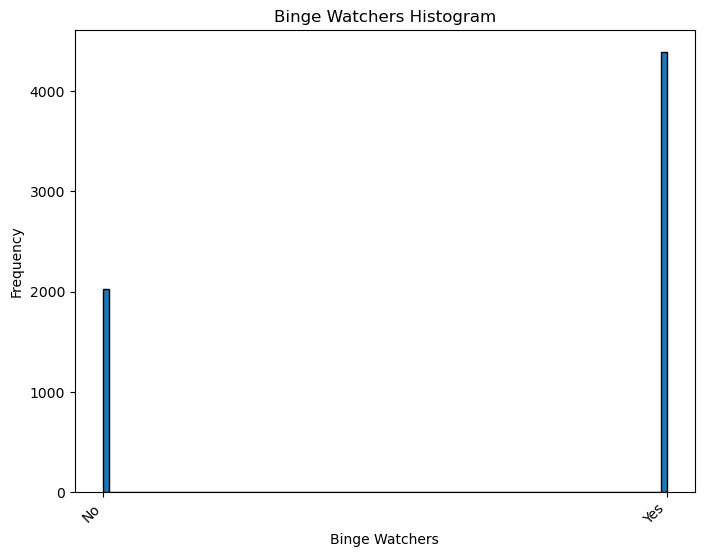

In [84]:
for i in range(len(tv_cols)):
        create_histogram(merged_df, tv_cols[i], x_labels_tv[i] + ' Histogram', x_labels_tv[i], 'Frequency')

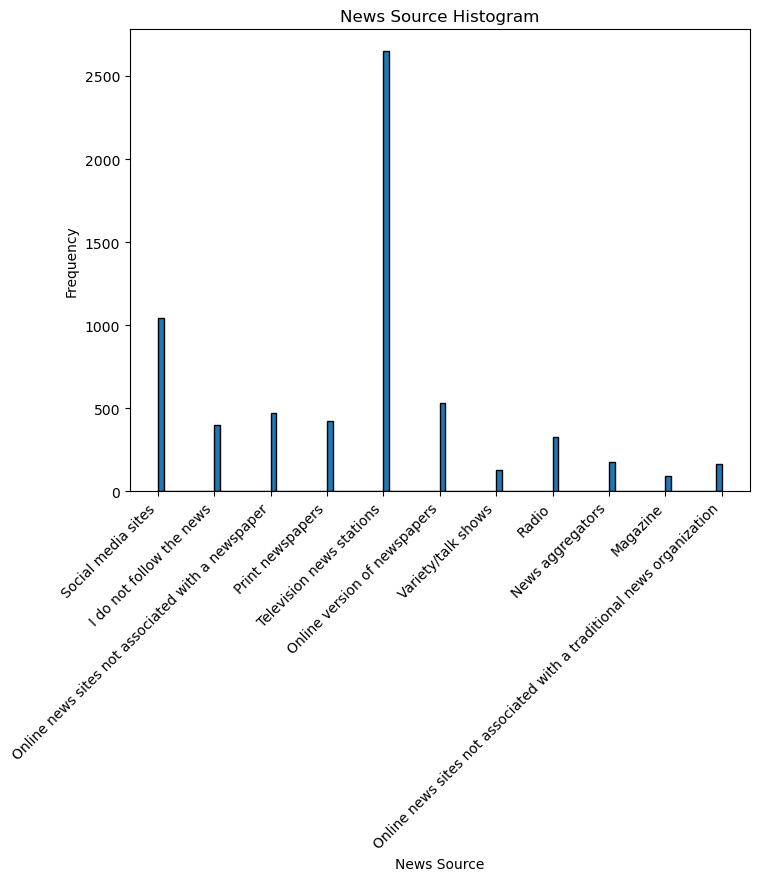

In [85]:
for i in range(len(news_cols)):
        create_histogram(merged_df, news_cols[i], x_labels_news[i] + ' Histogram', x_labels_news[i], 'Frequency')

## TV consumption behavioral patterns
Working on the subset of people who own a TV

In [86]:
#df1

In [103]:

df_filtered = df1[df1['Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television'] == 'Yes']

print(df_filtered)


KeyError: '[1.011630619177345, 0.9831072160187128, 1.516238637481136, 0.6376102269599635, 0.5169447529980108, 0.6462906751178416, 1.478163720718422, 0.428342009975909, 2.734829591518361, 1.505540494062003, 2.239393961305291, 1.010859644713778, 0.8992027492163664, 0.7024668725930083, 1.140459954576196, 0.9361366653985054, 0.8788735439922111, 0.6036154616505952, 3.008077198212414, 0.740709441911465, 1.086171036212842, 0.9464119526487217, 0.9389307678701339, 0.614431395282327, 0.5644285324392293, 0.5715751198528239, 0.8761228175174643, 0.9152999554162659, 0.8899212409510558, 0.2375942292852531, 0.9843506038320278, 1.404415530819732, 0.9977312243075576, 4.268552079845285, 0.818394853524096, 1.994512343257448, 1.468588816584654, 1.693786359524838, 0.5968663336095534, 0.830618237419789, 1.596586203734575, 2.487352264007778, 1.07315777378478, 1.01227913558124, 0.7206643568731521, 0.5933567356424578, 0.9799558857512859, 0.1525235066126634, 0.7803889396842296, 0.9269678863440844, 0.3735054375443844, 0.3794215814876011, 0.9909028825998036, 1.29700607666585, 0.3348606341631917, 1.012399162152585, 0.624982621575566, 1.182502415101131, 1.777018134000832, 1.019558648911174, 1.202450945959048, 0.8093033736540991, 1.4746257256061, 1.507147132965933, 0.8365048806257003, 1.623139553758903, 0.4463711985208463, 2.786175804254035, 1.264746004440176, 0.9992474097325328, 0.6999465712402777, 1.01054430412516, 1.896924190147221, 0.8365048806257003, 1.045270639571742, 2.590674795184837, 1.952318211635902, 2.117879575647364, 2.128966905285782, 0.4320332323312283, 0.9905353936490514, 1.343250164466127, 0.5025499581847964, 1.702146409435303, 0.7630798921749413, 0.6228629703458992, 1.759876166780555, 1.537691954267116, 0.8084677767911836, 0.720069106245268, 0.2211015528958724, 1.555632743986385, 1.100178390436892, 0.6099501395833754, 2.039519261085836, 2.053149702773548, 0.9271699351275948, 0.6364780402558383, 1.015254199813988, 2.484198384358205, 1.096280480234185, 0.584270339094341, 1.133060203388664, 0.8227313689957335, 0.2872347395621201, 1.656317524231316, 0.9799558857512859, 1.307741944703214, 0.9651131378245208, 0.6623219016771089, 0.8565338766183281, 2.15810555920871, 0.9638567788982273, 0.9295488944615918, 2.166154518857043, 0.8726301715068883, 2.49108196531883, 1.565390435374283, 0.7249269564357937, 0.7648687269157847, 1.32469515396238, 1.853483949621556, 1.848872616375165, 0.340744687585671, 0.697974104470447, 0.9719529547702194, 0.9217867432342886, 1.447594173317812, 0.9703594973300057, 1.451811415261722, 2.090901085051356, 1.132874338210968, 0.1930198645763649, 1.195629876917243, 0.79403418517004, 1.427374213356477, 0.6112506931720822, 1.099663449289751, 1.159900997558717, 0.4294193548864984, 0.5384605592997705, 0.8879030370847306, 0.8853512373733592, 0.8107900996076771, 0.5821184885824013, 2.06775967008452, 0.5219583855133546, 0.5398227255511255, 0.5653663926840522, 1.316581688203799, 0.5277812005978686, 0.6147191178573996, 0.7167044029004361, 0.9085305335899795, 1.376412715904763, 0.9778192580717511, 1.848872616375165, 2.095982714514163, 0.1998057882807997, 2.35261265744705, 0.9702540837681285, 0.2699373988696237, 1.852356789439682, 2.543575193265157, 1.021345542264993, 1.062940687044723, 1.475488694579969, 0.2975599238924773, 0.963613549569152, 0.8576047541390234, 1.976283281684397, 0.6101565544112105, 1.053017845876438, 1.963447850698378, 2.194426551323095, 1.909837385405983, 0.5529467377028382, 4.999999999999996, 1.584364309226546, 0.1354932084933795, 0.1368359275473526, 1.967915960506372, 2.337473401138516, 0.4843498171582931, 1.994959632991828, 1.268660925113608, 1.057264638562899, 1.344540528284033, 0.7179094104229938, 0.2687208565668582, 1.348849428166394, 3.780542081062954, 1.403348313047605, 0.2138588841107967, 2.047294340430571, 1.868146082554089, 0.8274203676407548, 0.6643027850601542, 2.144160672861205, 1.1582136461394, 0.4050450354594692, 1.475450376783599, 1.606799540464675, 0.9082328585012525, 1.55747821524907, 1.509335528546476, 1.442064010013276, 0.4822111713189199, 0.6861329370180923, 1.029754132712737, 1.525336551576297, 2.203393055699946, 0.6879622212256346, 0.7250448813130062, 2.786452108299583, 2.938147889097606, 0.6035837473398534, 0.3273317514412441, 0.5286173255631983, 2.623085361652118, 1.365372420808491, 0.4556705405507209, 0.6674374907435016, 1.678933778359922, 0.5735345020941518, 4.886332207478359, 2.134022902340095, 2.676049857422747, 0.9952293386895923, 0.4503343050896674, 0.1679154870785332, 0.7439664672547762, 0.8453477778705732, 1.909796436647745, 1.084484570359929, 0.6135348676037304, 1.036409288346304, 0.8707920674794354, 0.4214224037117357, 0.9652832092285578, 1.020270735814232, 0.5445904738088166, 1.236162364184379, 2.252543152049803, 1.159631836728201, 2.006093013138901, 3.26672199734992, 1.014286566949641, 0.3228008983074924, 1.840791947806184, 1.652587871070013, 0.6565115884593821, 1.205681985394647, 0.5720956699985248, 0.3742415010610794, 2.564083617632543, 3.192354297710774, 0.6366943449609807, 0.5422304778174094, 0.7953622134725633, 0.7721020805060109, 1.094994762968868, 1.973608246357924, 0.4752566853600267, 2.840106896003364, 2.082344816114114, 0.9289133637019507, 2.028605775347553, 1.094143317350205, 0.8017328569919566, 0.8943473780404658, 0.9579597477828887, 0.6426993191177512, 2.184878059432155, 1.648878197506851, 1.843797987266658, 0.9894849029601345, 0.7457059420668148, 0.3023308499530505, 2.697325844206002, 0.7505839920469064, 0.79616777717246, 0.9082328585012525, 0.6899518924253064, 1.133070756190583, 0.6056578049798557, 2.632549494418292, 0.7756028421581445, 1.314544238222228, 1.123072950099113, 2.741714431895334, 1.541162303867723, 1.953919392768345, 2.827328185324203, 0.904018248321012, 1.664738405704829, 2.329208036135662, 0.7897878509048795, 1.154305769429437, 0.7812635443537094, 0.8604055557992936, 0.632718750235495, 1.312147262295854, 1.31081942681247, 0.6550899425935678, 0.6651981321935042, 0.734433357172076, 2.315483585436379, 2.287233914058392, 1.273541982323127, 1.324626572848314, 0.1930310770291676, 2.157789771081348, 2.676198383203058, 0.8790616317367266, 0.363872066864905, 1.936509454552519, 0.6945275208961744, 1.13885596602527, 2.088204252666185, 0.8878246005335564, 1.738080384012826, 1.092578728207302, 0.8560554409761456, 1.128988205525273, 0.6727149740283775, 1.353555701993612, 0.2201546717623493, 1.494323216153026, 2.037776569227507, 0.2743190475180066, 0.6293937805053621, 0.679642354437827, 2.135499419717962, 0.994885825379578, 0.7539453448128773, 3.183681321655605, 1.966243313441233, 2.129272209603166, 1.210713007702996, 1.745883557078607, 1.7766094334493, 2.083214729833989, 1.167825290792749, 1.521166722396216, 0.4259335931986731, 2.641122955457574, 2.128966905285782, 2.047382568123373, 1.237388708693173, 1.461000047729627, 0.2991583275917693, 1.647931351421477, 2.207151999122208, 0.4902351388001364, 0.7619468528746542, 0.6449604155223706, 1.730726737873779, 0.9229010788212733, 0.1938082496547756, 0.4695539261550175, 1.130816956734612, 0.6956374674732081, 0.4232764442730263, 0.9134915940847422, 2.239393961305291, 0.8741148935611099, 1.999477736931039, 2.569099321128757, 1.739537766598876, 0.8560554409761456, 1.232038787408981, 0.9295488944615918, 1.565643433659145, 1.071552248108573, 2.436498068524728, 2.334600167355729, 0.7555912058538435, 2.215123543819537, 2.200915799056019, 1.716066207140861, 1.24869698262695, 1.834932708310873, 0.2009727346720796, 0.3341106267948311, 0.5927705113292442, 1.043134019855982, 1.261644398756486, 0.734348463508265, 1.715885981873398, 0.9395252359624457, 1.344648200439391, 2.179505716363871, 2.646498863189658, 0.4877795652637503, 0.8617627199598419, 0.3066320423656984, 1.024168036958604, 1.040086774440972, 1.444337298537023, 0.7943482974603239, 1.832334176707628, 0.7375372576812363, 0.2908541186460441, 0.3051853316308377, 1.591391444493455, 1.114685557790663, 0.3355367913382042, 1.903137045217362, 2.036017868394705, 2.200915799056019, 0.7886116352216472, 1.994852505922881, 0.5644285324392293, 2.609035068887923, 0.4460043036236611, 0.8554484752692807, 1.080468673873671, 2.668386557192919, 0.6277609273089282, 1.161754071229594, 0.487865056483129, 1.130589757699894, 1.254352857300831, 1.868813066173823, 1.79474652738754, 1.102313548622884, 1.410150516887143, 1.269538623185483, 0.7237559083095255, 0.9040336345241778, 1.715749316449187, 1.717711449435767, 2.580215088495331, 1.198853408179126, 1.938311242368713, 1.797078791077236, 1.710482519118055, 2.602509944303499, 0.3074050597801048, 1.994512343257448, 4.14303542063245, 0.9878883996224729, 2.378790506675265, 0.8728755086167149, 0.740709441911465, 1.180523116433062, 2.163936197925279, 1.179179261455182, 0.7593255233011016, 1.541448651851419, 1.259474154949947, 2.15810555920871, 0.8863264124155612, 1.067997652425397, 1.184949009040953, 1.917581088021336, 1.174670294252094, 0.8604055557992936, 0.6396210484720296, 1.618281916701035, 1.37950485765617, 2.424845739324423, 1.301862375716722, 0.9608655638737379, 3.69115451288262, 1.070208837754478, 0.9203768809509882, 1.201979060661287, 1.448364567109076, 0.9609776970544349, 1.271945336440066, 1.06626029638946, 0.9372178022451886, 1.374524337314943, 2.045466532415688, 3.377689486792274, 0.9754807392381087, 1.513806086745045, 1.166447210886039, 1.389882045056251, 1.105808790725408, 0.8355330362950629, 0.6008376018218073, 1.396341372731493, 1.831674469456675, 1.052904563001051, 1.408436580601888, 0.9463323843900746, 1.4390652491726, 2.260589246735219, 0.8919065570258671, 0.5235868193579203, 1.450058459107762, 0.9792330367383385, 1.094825998971608, 0.7669980331775226, 0.7154403964324147, 1.540893674017394, 1.099402199121301, 2.116312505476122, 1.67485651938801, 1.26987039680645, 0.9647796519958567, 1.780345037456007, 1.457849473958621, 0.9439253262497821, 1.164375983092962, 0.8602240716528814, 0.9437607968433237, 1.012908499289873, 0.4463711985208463, 0.639676840951774, 0.5205810021374744, 1.121857131352263, 1.099134716091542, 0.375484570357448, 0.1910028802677373, 0.6786519362802049, 0.6771329026248777, 0.2583155541251139, 1.138481604155963, 0.5632611131434551, 1.192432347159115, 1.219728275819085, 1.358544798676218, 1.930810792060758, 1.363285118715926, 1.495087050283666, 0.5649692963966397, 1.715885981873398, 1.23535845615707, 0.5298694294034125, 0.4405313517180244, 1.630487766159186, 2.422444827516577, 1.318405586324617, 0.9272796988781346, 1.269538623185483, 1.02833101084298, 1.404415530819732, 0.9359859478943594, 1.523769105664565, 0.9761433006998377, 0.4298583444126515, 2.116312505476122, 0.8355551155991983, 2.044683864541689, 1.936509454552519, 1.538194198059488, 1.831674469456675, 1.60249376092224, 0.839684634341812, 0.2487327696843965, 2.169216445777181, 0.7264094455460229, 0.9965968087882998, 0.8479025787350359, 1.381144405236453, 0.4067250818912115, 0.9196929026461401, 0.7647951878260216, 1.202909802360204, 0.4045738254017753, 1.405406476901152, 0.5556594572318436, 1.790256948014993, 0.7917173622763699, 0.8835332367086348, 1.581990396555776, 0.77624796176256, 0.8200091991201595, 0.6157726386758915, 1.497700704791472, 1.259315391839616, 0.6060409471154292, 0.2123560182590508, 1.462269063274762, 1.387414070257262, 0.418387196080427, 0.5863140267970055, 1.117153371233625, 0.8819643713721681, 1.097450021286472, 1.742756432225114, 0.6056578049798557, 0.5641039713867882, 1.560905753267869, 1.165561179256331, 0.2683188297209555, 3.445446404498638, 4.893048154471048, 2.178974257128183, 0.5053967226081899, 3.451984207527859, 1.320391166655437, 2.796366723940794, 1.286090231873338, 0.5338402014587704, 1.653779066938018, 0.5230015827430202, 2.013479381704203, 0.9753737391551524, 0.2807339099158518, 1.833389778948656, 2.327100217135754, 1.152650180589359, 2.497809881061133, 0.5996372725938383, 1.50408756699619, 1.293537818030651, 1.492829615815054, 1.73031014090997, 1.488914849875846, 0.5202857373226535, 1.10919674484812, 0.6565011417062898, 1.252675999932352, 2.809037130018512, 0.4713635482266185, 1.119560646375516, 1.904482394420364, 1.568831955887839, 0.7362276333345175, 0.8680306456077158, 1.156428468818945, 0.3085275017119073, 1.591086443311527, 0.6836995976919634, 1.18108611181811, 2.329747737995527, 3.941594199435874, 0.8811076905766149, 1.163494747891968, 0.7917543499409299, 1.42082418431292, 0.3041139678475217, 0.9661136464284515, 0.4962902431733594, 1.050979728142235, 1.589545335521716, 0.6224880287639328, 0.9442252009119636, 3.773151118048013, 0.6229167518279035, 1.655570072343029, 1.589727003693139, 0.9359859478943594, 1.978889840013144, 0.4986386559543873, 0.9772566615426731, 0.7677765217128707, 0.9515554939733915, 2.02805004072472, 1.4395887838058, 2.193527554591563, 2.053149702773548, 1.418301266419886, 0.9464873376654898, 2.41675608676469, 1.711232793639625, 3.245144502773152, 1.225893367066319, 1.607374511419832, 1.413596421119101, 2.065110259290513, 1.290855138976867, 0.5949963142544471, 1.667303200607273, 0.7132879451292142, 1.565154359801756, 1.389639971338291, 1.329163586136017, 1.124902087025544, 0.7418404309109782, 1.714777055343371, 1.075819345168153, 2.940504425527209, 2.726410618108296, 1.916884037074397, 4.43975930115159, 1.372611980585159, 1.81597184803698, 1.230866585577549, 0.7594105105409066, 0.8420510269211873, 1.270050900719604, 0.2450589944537812, 3.854013635519803, 1.152301036486409, 0.8006343276625051, 0.8871635041850724, 0.5483878862023795, 0.917452141040875, 1.829692522848031, 1.728410461630979, 0.8114835814220932, 2.055686055591726, 0.7936919713764918, 0.6056589466494655, 1.780655411772554, 2.163936197925279, 1.153664256320349, 0.1139760122204944, 0.7916905340029355, 0.487865056483129, 2.713473167438784, 1.862184092782717, 2.071269492756895, 0.7077236859069931, 0.9420122665797084, 1.835531058570405, 0.5780311201078396, 0.6536390966291488, 2.904049430682984, 1.632268341800702, 1.860458777314621, 0.4022840100452727, 0.6866685474467414, 1.184274179373916, 1.169987494723388, 1.11289214542994, 1.831954936327066, 0.7819103115582781, 0.8699507198179793, 0.5814196620229845, 0.2057191147282608, 0.704461043822898, 0.4189374448197982, 1.534223458719749, 0.7830820937467925, 0.8194426017197761, 1.017067479447073, 0.5397695154790932, 0.3210998634561516, 2.548074693705978, 1.858877464404852, 1.821483708184553, 1.029961224686435, 1.277009200702738, 3.311375495794672, 0.4913399168166434, 2.781151388501991, 0.813984978472408, 4.15046468542312, 1.697137418709161, 0.7198255082055186, 0.2410729485790208, 0.2571418186975262, 0.5782119407478468, 0.7002833144558276, 1.809332345176488, 2.189268318001666, 1.231465263271562, 1.43217800194792, 0.6007039258079164, 1.845499767036759, 0.4616480933325781, 0.6594732273899359, 1.748641067510848, 3.067783360050074, 2.786175804254035, 0.4929592634878493, 1.003306981670853, 1.168370301188573, 1.686836775546229, 1.893910911157735, 2.580215088495331, 0.3906386352717258, 0.42883656000716, 1.429699764805196, 0.2842417520920085, 2.137818967881267, 2.631823260531842, 0.6333559562346052, 1.564446901185243, 0.8463785207376623, 0.9886079167002207, 1.207819836893627, 2.720033449436205, 0.7704453178197583, 1.330991509930681, 0.860139242058393, 1.628624201610674, 1.059962309652218, 0.539630309187668, 3.312835595789447, 2.431041050090117, 1.378691945620896, 0.6677960482786999, 0.3207898726298055, 2.352849840182573, 1.154013303781844, 0.5672356237991687, 0.5139632406620608, 2.370324077098937, 1.685470792634525, 2.172993284100357, 0.06376295572584478, 2.586198063731674, 0.7017365150484909, 1.179707153762605, 1.067260007404135, 0.7457826277192, 0.6502734532390726, 1.299099224473479, 0.6103954780816505, 1.570593376134954, 1.690223548533348, 0.2702519704217637, 0.8630785929592111, 2.462843173119335, 1.022414713167614, 1.638070951653651, 0.7013020317062191, 1.069158482314192, 0.9082328585012525, 0.696708707668286, 1.389775262516009, 1.19679645263551, 1.031656152162227, 2.178974257128183, 2.536238799308536, 0.2016898975600418, 2.239578139765052, 0.3658746136288029, 0.6282407018184449, 1.087983797053134, 1.245157516274241, 1.07861197558947, 1.061019007432949, 1.084976562309494, 1.314243870804938, 0.2379013427213612, 3.222715509305958, 1.47022993263931, 0.311160230989656, 0.3724214630662479, 0.3075066772938819, 1.857418509645564, 2.015915372370273, 1.154375031026844, 2.837211252958205, 0.8161534534926631, 2.548074693705978, 0.8868477608576782, 1.887140522799538, 1.931356020463063, 1.214128461460783, 0.8652401007112988, 1.500537878942829, 1.662030855073632, 1.37857907741854, 0.6663201757372506, 1.338704232267436, 0.4921958776811413, 0.2647844044311648, 0.7552237501265783, 1.31298375126896, 2.87961284325902, 0.1679450770007173, 0.2704652245640141, 0.3979992145247079, 1.034610225155285, 0.3296439537561844, 0.8480713567836891, 1.986838680098705, 2.579054292425381, 0.9327485296075018, 2.87961284325902, 0.7226557151825392, 0.4543363993889956, 1.895293320467117, 0.636025009970497, 1.82482985400716, 1.932832346863897, 1.742756432225114, 0.9799558857512859, 1.312147262295854, 2.040253827007577, 1.980599594271623, 2.158286160356859, 2.648717955812009, 1.934245377653175, 1.287292656770354, 1.190416849787666, 0.8450881091207239, 2.066007150402233, 1.099083368819262, 0.5529467377028382, 1.508223549428049, 0.7620575130922675, 0.1733911941469579, 0.9207423182844239, 0.3735054375443844, 0.9001295258113634, 0.4528373547999274, 1.071087427312194, 0.8162249377812892, 0.745045863805897, 0.4382705606639951, 0.7352564580784843, 0.4835153437869475, 0.6935408262879882, 0.9191303797338991, 0.3085935491855225, 1.358545837317587, 0.7198255082055186, 1.260999429611438, 0.447848837948703, 0.4719041107655652, 0.8394974533919125, 0.7165814294487076, 0.8016471922556526, 0.7586231049454191, 0.4382916880901739, 0.3794983823273089, 0.5640967849864112, 0.3724010037723476, 1.02482271231921, 1.204426225271131, 1.359068316058854, 0.8424391924301541, 0.97986239153859, 0.2116629213019552, 0.3178754652954772, 0.780152306791936, 2.13283309671178, 0.5731538558076571, 1.064934899612671, 1.171027102534505, 0.2788003764260902, 1.013241240741646, 0.9267890058771331, 1.16455427290012, 1.029476463245548, 0.6973281632124815, 0.3051853316308377, 0.5073940001359343, 0.9045790930018383, 0.5476954214700048, 0.5316645276634824, 0.3017940094914484, 0.931194612245131, 0.6343660754013913, 0.550805830302909, 0.6488728099176287, 0.340744687585671, 0.6063865491701721, 0.5649692963966397, 0.3613114302447943, 0.8092259154180484, 0.817259635870615, 0.7199523552352026, 0.6158713980331969, 0.4787198160358598, 0.6482398576001317, 0.5746251759154943, 0.2179271640010842, 0.6577489002950039, 0.9414607371550537, 0.4433020522634092, 0.9342171726274463, 0.5268885138117361, 0.8928755366746912, 0.6878254686188626, 0.5069083447397397, 1.462727507994, 0.8163447344921042, 0.7994827977717164, 0.9965441143237554, 0.7648309177331986, 1.167052945373734, 0.5103817058992147, 0.6343660754013913, 0.6101565544112105, 0.6999465712402777, 0.7989424455977814, 1.353555701993612, 1.562610815219592, 1.69156215030234, 0.6774697763889184, 1.65332739924746, 0.9455413081906455, 1.308860150849172, 1.260060457974635, 0.7104859557966781, 0.8125617527581069, 0.6169814193201546, 0.6879516811299173, 0.3973024420550502, 2.560174346300724, 0.7580165633400413, 0.9903300274069904, 0.8074675383661521, 0.7669980331775226, 1.282441536151718, 0.1649691290897895, 1.416367318511542, 1.185555593551222, 0.6989886517965669, 0.8643308053875807, 0.8577804519191601, 0.7122992714494306, 0.6695536609562116, 0.8562573150846826, 1.037271818629038, 1.02833101084298, 1.42377900811227, 0.7724512328289618, 0.7572262639370453, 1.076629835930848, 0.7122992714494306, 0.7359518652766872, 0.8219610010248111, 0.6639582248486473, 1.048120076790643, 0.9235351166572756, 0.9065087998494784, 1.189276765217871, 0.9235351166572756, 0.9038788494951208, 1.022412638956928, 0.6836676579225378, 1.048120076790643, 0.278209100424751, 1.027018080778202, 0.4381434617475589, 0.745045863805897, 1.703914280723275, 0.5493633754324749, 0.8562573150846826, 1.426091198953285, 2.007064572137341, 0.6136275782575284, 0.5486696789225469, 0.6796294780281252, 1.229278584735499, 0.7226557151825392, 0.3152313157188625, 0.8640146921982145, 1.103842112540154, 0.6359249601022573, 0.6844728700071633, 0.817259635870615, 0.4911071841354657, 0.7110344614912548, 1.720953732262947, 0.4001048131395509, 0.8514599380648727, 2.47300270552419, 1.933772451685891, 0.7463711742920617, 0.5899950701662509, 0.6823037593952411, 0.6367248683512097, 0.584270339094341, 1.090894755613662, 1.20218500185529, 0.5811789639610826, 1.737649475896879, 0.9832090277824299, 0.9099961791576076, 0.8802589126806715, 0.2111564382480028, 0.751193713548483, 0.7712615900315318, 0.5532567479059857, 0.6948416244790677, 0.8095220661535535, 0.9800788188801939, 0.9191303797338991, 2.03947257117821, 0.2635351336851629, 0.9062083914205874, 0.7567631124633416, 0.7258434993375623, 0.5455592080850089, 0.6652246928584566, 1.385322243667313, 0.6116085562483969, 0.9173099576596404, 2.117717717360986, 0.7691115258670859, 0.2375461462441427, 0.730998773065221, 0.6945275208961744, 0.9230101331042562, 1.749901440013105, 0.8434243908737722, 1.215139458918385, 0.6180789248356089, 0.529589809472716, 0.6372223754912967, 0.9003173924778823, 0.9643981453606982, 0.9908441872373633, 0.6215884233553424, 1.139561589413285, 0.211140664177366, 1.221626106555957, 0.6747661180255797, 0.2614298276939559, 1.000651889832369, 0.3739921626374464, 0.7966222277030262, 1.194553482475079, 0.5375044298963231, 0.3682361920834506, 0.8903228234179515, 0.8036156370392883, 0.4958126957167946, 0.8919065570258671, 0.5739871162381128, 0.730996724721281, 0.4743019130565517, 0.416946373424077, 0.9223801630249403, 0.2993203240887134, 1.088592741728942, 1.111921461881757, 0.808695914383413, 0.593252758548419, 0.6524430989079599, 0.8675730546858109, 0.6488728099176287, 0.5223033165337178, 1.038239921352099, 0.660033698901913, 0.5900098405696798, 0.5056840810300569, 0.5058901602443651, 0.2608667883888844, 0.6804843098400084, 0.8903315219503349, 0.5403256887838697, 1.014710292066464, 0.8903228234179515, 0.2448841514389755, 1.443294566403377, 0.6848837869692354, 0.6977474771346234, 1.090435138097499, 0.9913500336573774, 0.6463560746202728, 0.8903228234179515, 0.5731534708583634, 0.4650841829290855, 0.7303226550408829, 0.6605706679477306, 0.547710662333654, 0.940788847937116, 0.7980984502119095, 0.9830612890971423, 0.8465992625912309, 1.056781060999977, 0.370781336231469, 0.8560554409761456, 1.478991078170544, 0.7721381517785642, 0.0, 0.6756956129273832, 1.655483709357864, 0.6367248683512097, 0.2987325727631156, 0.5439370203276352, 0.6689839444182502, 0.4719041107655652, 0.4428088099028913, 0.7712615900315318, 0.6056589466494655, 0.3035991207646901, 0.9792663517456563, 0.6360908774842114, 1.017904165099235, 0.6630966410647291, 0.5709693897977894, 0.5840483751304755, 0.4154048278800995, 0.7165993689152177, 0.2561030337218122, 0.9427957997847679, 0.9983909032932138, 0.5718370537997052, 0.6800641301031748, 0.1703779380764041, 0.8878246005335564, 0.8483238943872505, 0.9669746245017526, 0.6695949812173998, 0.6944064623785094, 0.6715841940856357, 0.7940759060721829, 0.422129498182575, 0.5837386031945313, 0.5721048372724488, 1.000651889832369, 0.4184567744762283, 1.02833101084298, 0.721233028616917, 0.6756956129273832, 0.3572691998950078, 1.111500385871933, 0.4878259773327748, 0.3081013245506569, 1.363037314563272, 0.8933633616003237, 0.3884684158716255, 1.238156563588781, 1.452226020606544, 0.8349741164253515, 0.6530480574709078, 0.4294702924275313, 0.7198268650821245, 0.6395580994143236, 0.7104276547849285, 0.5663942256250355, 0.6945275208961744, 0.8945978788333345, 1.02833101084298, 1.311476475425344, 0.7858043617161037, 1.076728282758354, 0.6073045510528453, 0.4376266561242189, 0.9926067313373905, 0.7035193911263998, 0.9083803243119923, 0.5595244121881703, 0.6989886517965669, 0.8726035167352126, 0.8386993850494684, 1.138539477755268, 0.5977862001774363, 0.7400424355093489, 0.5009815003830078, 0.567512060412996, 0.7733373368697519, 0.3836479271510868, 0.6852010199348468, 1.346151874284875, 0.2831791195124869, 0.8163447344921042, 0.6592900582716151, 1.398457858261961, 0.7751233606964438, 0.648822771136131, 0.5721048372724488, 0.6967171074940846, 0.891682306413587, 0.1265235971875447, 0.8109620688905324, 0.5612712537842112, 0.6370230379002033, 0.4497237487309934, 0.2081412927115907, 0.721233028616917, 0.6423022716074077, 0.6794850347408199, 0.2807339099158518, 0.7886858273671918, 1.501569469015282, 0.6008232135061325, 1.209020035315964, 0.8404227488533198, 0.6296329643420496, 0.6755943507146461, 1.029476463245548, 0.8533641994975425, 0.9330505668618604, 0.6262414124236906, 1.149645323509834, 0.1741642490889021, 0.333398505873453, 0.6942135905314232, 1.742639457299163, 0.7698271308301002, 0.5935401313969977, 0.5915018588529481, 1.333174583398187, 0.3257960007088278, 1.11289214542994, 0.9269678863440844, 2.227118890985505, 0.2668067637878369, 0.5081813638468865, 0.963613549569152, 1.50937969977139, 0.6874733172842298, 0.5375339142320045, 0.6928272375615926, 0.2278164255045807, 1.05149814896894, 0.2069139602684108, 0.7539453448128773, 1.651108444674986, 0.3359660650527048, 1.045290794800747, 0.9123660387463458, 1.05518130703803, 0.7894326781080658, 0.447848837948703, 0.9439253262497821, 0.9250061909562894, 0.3644963263781088, 0.4214224037117357, 1.354256342830739, 1.237793160951614, 0.254161415870802, 0.9336952333815378, 1.330512635899552, 0.8953541271241809, 0.4320332323312283, 1.02833101084298, 0.648822771136131, 1.07980003854586, 0.7362276333345175, 0.8238064960476121, 0.8291203310713007, 0.905164238734877, 0.7539453448128773, 0.2616580503170871, 0.3082261921604538, 0.5361836631247865, 0.4792750386073006, 0.4675292600040094, 0.4025847857271939, 1.107169416490658, 0.5699555353703386, 0.9646909840314093, 0.3976827321149219, 0.8789021949909294, 0.578282282031325, 0.5609567527572208, 0.5938249497372916, 1.260999429611438, 0.9384058785025768, 0.9463938028140766, 0.4608283576834998, 0.6545260131769745, 0.5743815539196084, 0.8038673914584307, 1.098858362440904, 0.6612077871357678, 0.9527078665554373, 0.5522743453229316, 0.9126904817955996, 0.7769226697865336, 0.6550899425935678, 0.5447843958189491, 0.2406004428355797, 0.2107133006902851, 0.1811359388248078, 0.7935760563659846, 0.5439370203276352, 1.354256342830739, 0.8213487521720675, 0.5803819221918964, 0.4059824299636556, 0.5811526515119185, 0.5230015827430202, 0.7415767216072597, 0.721946296785268, 0.4785118753149492, 0.5921136916032781, 1.345111170571174, 0.6087150452433402, 0.750676298650143, 0.6381930774508543, 0.4124129605931229, 1.04896775468755, 0.6774697763889184, 0.7797462550610005, 1.232100580087543, 0.639306380549999, 0.709529629899178, 1.343065533974163, 1.443419018574324, 0.6942496894988902, 0.7082697379162889, 0.6360908774842114, 0.5827020748308434, 1.120573676763028, 0.6715841940856357, 0.5815704110979449, 0.7479490030416588, 0.6571782997013762, 0.5336596043112373, 0.9446839455824262, 0.4238129681897439, 0.6110351376422846, 0.8121944337189588, 0.5118406639709248, 0.5821667415558963, 0.584270339094341, 0.9065511503712769, 0.7452844089917985, 0.5588101317786941, 0.7045884825019398, 0.7936769341985794, 0.08997082537428569, 0.613974646191404, 0.9670002846751274, 0.6828968119299056, 0.6136275782575284, 0.5298694294034125, 0.5298694294034125, 1.114776481539231, 0.9129253582632965, 0.3260206920951625, 0.5336596043112373, 0.9145492979550245, 0.990341967260218, 0.4752814560776622, 1.070058355527165, 0.8507514422522117, 0.364519333683319, 0.78290762753042, 1.103845236884476, 0.7045884825019398, 0.8912900824766272, 0.721946296785268, 0.7666961604247463, 1.475638801140879, 0.4240947181698512, 0.7459179159866679, 0.9330731204345842, 0.8254473426763418, 0.6149517307323693, 0.5944122168443348, 1.271693804074945, 0.6357508951584167, 0.6457357806615509, 0.9470446692062041, 1.188387566714303, 0.8731271131752917, 0.4464437615307484, 0.8522647850708357, 0.7831091050101955, 0.4821664078436617, 0.5081542375360332, 1.010859644713778, 0.8226029148563148, 0.4955235161436083, 0.8864749510550147, 0.6471268289764056, 0.6929269109944253, 0.6276118344539798, 1.323334797154011, 0.5529467377028382, 1.19679645263551, 1.312146011250019, 0.7206643568731521, 0.7080837124660255, 1.015194810815252, 0.4854436231011767, 0.8575782187107508, 1.054599102651467, 0.8808791113517643, 0.1792694955030516, 0.7240168232536216, 0.8929984185490363, 0.868300860161565, 1.860189075746914, 1.19814034445187, 1.151548810420831, 1.674011568696965, 0.5865901753373792, 0.6751519996046725, 0.6899518924253064, 0.9537451894187179, 1.565154359801756, 0.4347442184938217, 0.860139242058393, 2.56006407360301, 1.989566085455283, 0.3170968653337624, 0.8810251865731449, 1.331155095434033, 1.719511163827775, 1.739052366265933, 1.053360717224825, 2.718962491354199, 1.110215659820797, 1.827549952040454, 1.703671466180115, 0.6072002853125814, 3.268806797470484, 1.31472893425725, 1.132448446457578, 2.530722523224615, 1.118281719727029, 0.2629210664501479, 0.6425307833893826, 1.209936059244554, 1.268007996617455, 0.7917543499409299, 0.243106785952971, 0.9191303797338991, 0.6525119338105149, 0.5598041604196119, 0.8878381739371555, 0.9643981453606982, 0.3568960366733569, 1.011203775559201, 1.471195498793611, 1.292300466838015, 0.7452844089917985, 0.5124506973438431, 0.6618616929450101, 0.5018726616766773, 0.4937094657762469, 0.589112392654028, 0.8520455152910588, 0.578282282031325, 0.5926660722256006, 0.3483484735350886, 0.6922423133854246, 0.3127439198851609, 0.1643971230274686, 1.081720820048807, 0.9026087001808121, 0.5081813638468865, 0.7316808475893912, 0.9099961791576076, 1.462890683026844, 1.896223263974923, 0.6343660754013913, 0.9191129660173144, 0.6630966410647291, 0.8959382706498635, 0.1879372795181617, 0.6499769170270382, 0.5718370537997052, 0.9001295258113634, 0.598496433712749, 0.5811789639610826, 0.8120416655825572, 0.9651131378245208, 0.5007810930757709, 0.6367248683512097, 0.1721895712145305, 0.4303565085926449, 0.5368790646175323, 0.5927341094593095, 0.9496196250263694, 0.6372223754912967, 0.6677960482786999, 0.5538673211961563, 1.242724641448592, 2.077041057946238, 0.8016471922556526, 0.7725673201277414, 0.9607636072887928, 0.4017177646420466, 0.9083242733394604, 0.5045319874932807, 0.5629156658628003, 0.931194612245131, 0.5926660722256006, 0.5298694294034125, 1.020444521852489, 0.5247280983314322, 0.6630966410647291, 1.263242534161504, 0.4880257680825186, 0.3794215814876011, 0.6360908774842114, 0.678445837979938, 0.6155831288717004, 0.3317376952409251, 0.6945275208961744, 0.8878246005335564, 0.3822091620028015, 0.284028915676413, 0.6050524401615643, 0.6555254450254125, 0.7844090308183851, 0.5654325552639601, 0.2740842859720108, 0.5247280983314322, 0.2813852426840826, 0.9167283933500778, 0.718679309550239] not found in axis'

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values_filtered = df_filtered.isnull().sum()
print("Missing Values per Column in df_filtered:")
print(missing_values_filtered)


missing_percentage_filtered = (df_filtered.isnull().sum() / len(df_filtered)) * 100
missing_percentage_filtered = missing_percentage_filtered[missing_percentage_filtered > 0].sort_values(ascending=False)
print("\nPercentage of Missing Values per Column in df_filtered:")
print(missing_percentage_filtered)


Missing Values per Column in df_filtered:
record - Record number                                                                                                                                                                                                                                              0
Q1r1 - To begin, what is your age?                                                                                                                                                                                                                                  0
Q4 - What is your gender?                                                                                                                                                                                                                                           0
age - you are...                                                                                                                                                            

In [89]:

missing_percentage_filtered = (df_filtered.isnull().sum() / len(df_filtered)) * 100


columns_to_drop = missing_percentage_filtered[missing_percentage_filtered > 19].index


df_filtered_dropped = df_filtered.drop(columns=columns_to_drop)

print("Filtered DataFrame after dropping columns with more than 19% missing values:")
print(df_filtered_dropped)


Filtered DataFrame after dropping columns with more than 70% missing values:
      record - Record number  Q1r1 - To begin, what is your age?  \
1                          9                                  33   
2                          7                                  24   
3                          4                                  51   
4                         15                                  20   
5                          8                                  23   
...                      ...                                 ...   
2070                    5069                                  67   
2071                    5032                                  73   
2072                    5080                                  27   
2073                    5173                                  29   
2074                    5212                                  25   

     Q4 - What is your gender? age - you are...  \
1                       Female            30-46   
2   

In [90]:

missing_percentage_filtered = (df_filtered_dropped.isnull().sum() / len(df_filtered_dropped)) * 100
missing_percentage_filtered = missing_percentage_filtered[missing_percentage_filtered > 0].sort_values(ascending=False)
print("\nPercentage of Missing Values per Column in df_filtered:")
print(missing_percentage_filtered)


Percentage of Missing Values per Column in df_filtered:
Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r    13.068182
Q73r2 - Read for work and/or school - Which are things you typically do while watching your home television system?                                                                                                                                                  9.848485
Q73r3 - Read for pleasure - Which are things you typically do while watching your home television system?                                                                                                                                                            9.848485
Q73r4 - Browse and surf the Web - Which are things you typically do while watching your home television system?                      

In [91]:

df_cleaned = df_filtered_dropped.dropna()


print(df_cleaned)


      record - Record number  Q1r1 - To begin, what is your age?  \
2                          7                                  24   
3                          4                                  51   
4                         15                                  20   
5                          8                                  23   
7                         11                                  43   
...                      ...                                 ...   
2070                    5069                                  67   
2071                    5032                                  73   
2072                    5080                                  27   
2073                    5173                                  29   
2074                    5212                                  25   

     Q4 - What is your gender? age - you are...  \
2                         Male            24-29   
3                       Female            47-65   
4                         Male

In [92]:
from sklearn.preprocessing import LabelEncoder

for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object': 
        le = LabelEncoder()
        df_cleaned[column+'_encoded'] = le.fit_transform(df_cleaned[column])


df_cleaned = df_cleaned.drop(columns=df_cleaned.columns[df_cleaned.dtypes == 'object'])


/var/folders/_5/kctvxtcx61x5gst0123hf5x00000gn/T/ipykernel_2377/3071068965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column+'_encoded'] = le.fit_transform(df_cleaned[column])
/var/folders/_5/kctvxtcx61x5gst0123hf5x00000gn/T/ipykernel_2377/3071068965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column+'_encoded'] = le.fit_transform(df_cleaned[column])
/var/folders/_5/kctvxtcx61x5gst0123hf5x00000gn/T/ipykernel_2377/3071068965.py:7: SettingWithCopyWarning: 
A value is try

In [114]:
# Assuming df_cleaned is your DataFrame
# Get the list of columns containing 'percent' or 'percentage'
percent_columns = [col for col in df_cleaned.columns if 'percent' in col.lower() or 'percentage' in col.lower()]

# Filter the DataFrame based on the specified condition
  # Create a copy to avoid modifying the original DataFrame
for col in percent_columns:
    df_cleaned = df_cleaned[(df_cleaned[col] >= 0) & (df_cleaned[col] <= 100)]

df_cleaned = df_cleaned.drop(columns='wg')    
    
# Display the resulting DataFrame
print("DataFrame after filtering rows:")
print(df_cleaned)


DataFrame after filtering rows:
      record - Record number  Q1r1 - To begin, what is your age?  \
2                          7                                  24   
3                          4                                  51   
10                        12                                  21   
11                        22                                  64   
13                        16                                  15   
...                      ...                                 ...   
2063                    4983                                  69   
2068                    4992                                  83   
2071                    5032                                  73   
2072                    5080                                  27   
2074                    5212                                  25   

      Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
2                  

In [115]:
display(df_cleaned)

,record - Record number,"Q1r1 - To begin, what is your age?","Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?",...,Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?_encoded,Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?_encoded,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_encoded,Q73r13 - Play video games - Which are things you typically do while watching your home television system?_encoded,"Q39r1 - I would rather pay for online content (news, information, sports, games, social interaction sites, movies, music, and television) in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or di_encoded","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements._encoded","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho_encoded","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest_encoded",Q89 - Which of the following is your most frequently used mechanism to get news?_encoded,Cluster
2,7,24,20,0,30,50,0,0,15,85,...,1,3,3,3,0,2,0,1,2,0
3,4,51,10,5,30,55,0,0,1,99,...,1,1,1,1,0,2,1,2,4,0
10,12,21,0,50,0,50,0,0,0,100,...,2,2,2,1,2,3,0,3,6,0
11,22,64,0,0,0,100,0,0,0,100,...,3,3,4,1,2,3,1,2,7,1
13,16,15,0,0,0,100,0,0,0,100,...,1,1,1,1,0,2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,4983,69,0,0,0,100,0,0,0,100,...,1,1,1,1,2,2,2,2,5,1
2068,4992,83,0,4,6,90,0,0,0,100,...,1,1,1,1,3,0,3,0,7,1
2071,5032,73,10,0,70,20,0,0,20,80,...,1,4,4,3,4,4,1,4,6,1
2072,5080,27,20,5,60,15,0,0,0,100,...,1,3,4,1,3,0,1,1,2,0


In [116]:
# Assuming df_cleaned is your cleaned DataFrame
column_names = df_cleaned.columns
print("Column Names:")
print(column_names)


Column Names:
Index(['record - Record number', 'Q1r1 - To begin, what is your age?',
       'Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
       'Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
       'Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the follo

In [117]:
import pandas as pd
import numpy as np


correlation_matrix = df_cleaned.corr()
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
correlation_matrix = np.where(upper_triangle, np.nan, correlation_matrix)

highly_correlated_pairs = np.where(np.abs(correlation_matrix) > 0.45)

columns_to_drop = set()


for i, j in zip(*highly_correlated_pairs):
    if i != j: 
        columns_to_drop.add(df_cleaned.columns[j])


df_cleaned_dropped = df_cleaned.drop(columns=columns_to_drop)


print("Dropped Columns:")
print(columns_to_drop)

print("\nDataFrame after dropping highly correlated columns:")
print(df_cleaned_dropped)


Dropped Columns:
{'Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?', 'Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above_encoded', 'Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?', 'Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?', 'Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?', 'Q17r2 - Tablet - Of the time you spend watching TV shows, what percentage of time do you watch on the following devices?', 'Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)_encoded', 'Q8 - Which of the following media or home entertainment equipment does y

/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

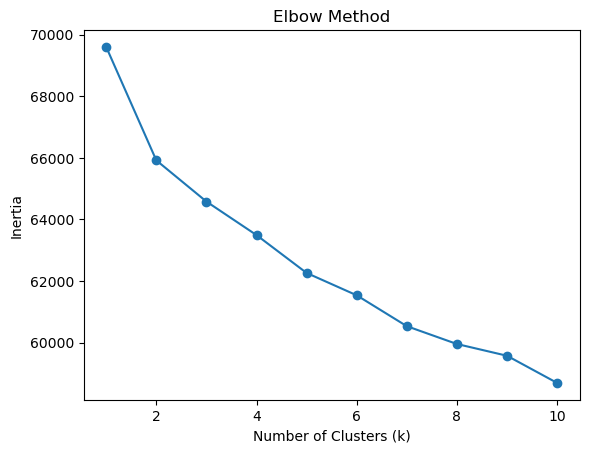

In [118]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = df_cleaned_dropped


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [119]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


n_clusters = 2

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# Get the cluster centers and inverse transform to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame with cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Display the DataFrame with cluster centers
print("Cluster Centers:")
print(cluster_centers_df)



/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   record - Record number  \
0             1816.594393   
1             1665.874627   

   Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r  \
0                                           1.609346                                                                                                                                                                                                                  
1                                           1.519403                                                                                                                                                                                                                  

   Q4 - What is your gender?_encoded  \
0                           0.530841   
1                        

In [120]:
display(cluster_centers_df)

,record - Record number,"Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to r",Q4 - What is your gender?_encoded,Q2 - In which state do you currently reside?_encoded,region - Region_encoded,QNEW3 - What is your employment status?_encoded,Q5 - Which category best describes your ethnicity?_encoded,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?_encoded,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential._encoded",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television_encoded,...,Q73r9 - Use a social network - Which are things you typically do while watching your home television system?_encoded,Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?_encoded,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_encoded,Q73r13 - Play video games - Which are things you typically do while watching your home television system?_encoded,"Q39r1 - I would rather pay for online content (news, information, sports, games, social interaction sites, movies, music, and television) in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or di_encoded","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements._encoded","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho_encoded","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest_encoded",Q89 - Which of the following is your most frequently used mechanism to get news?_encoded,Cluster
0,1816.594393,1.609346,0.530841,21.252336,1.631776,1.128972,7.200000,0.241121,1.874766,0.0,...,1.912150,2.682243,2.168224,1.637383,2.024299,2.422430,0.957009,1.842991,5.760748,0.992523
1,1665.874627,1.519403,0.620896,20.976119,1.665672,1.161194,6.483582,0.510448,1.692537,0.0,...,2.214925,2.391045,2.304478,1.868657,1.328358,1.623881,0.988060,1.047761,4.874627,0.014925


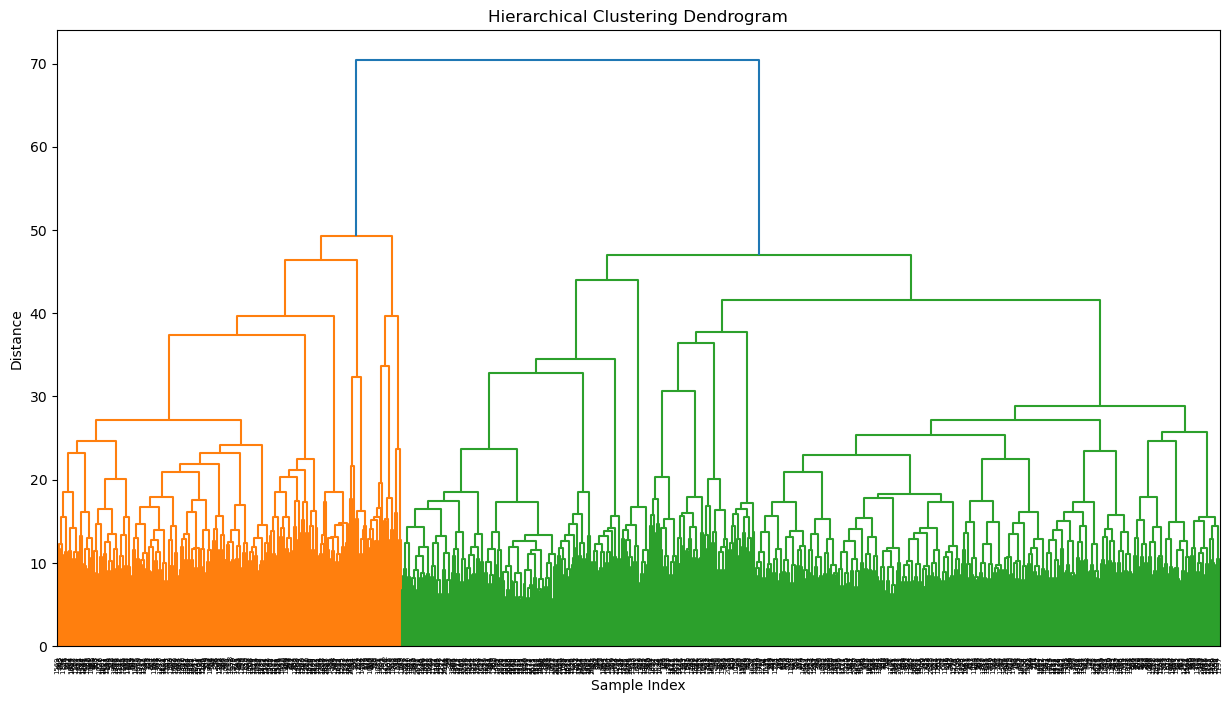

In [121]:
##Heirarchical clustering
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


linkage_method = 'ward'

clusters = linkage(X_scaled, method=linkage_method, metric='euclidean')

plt.figure(figsize=(15, 8))
dendrogram(clusters, labels=df_cleaned.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [122]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to obtain clusters
num_clusters = 3  # Adjust as needed
cluster_assignments = fcluster(clusters, num_clusters, criterion='maxclust')

# Add cluster assignments to the DataFrame
df_cleaned['Cluster'] = cluster_assignments

# Display the DataFrame with cluster assignments
print("DataFrame with Cluster Assignments:")
print(df_cleaned[['Cluster']])


DataFrame with Cluster Assignments:
      Cluster
2           2
3           3
10          2
11          1
13          1
...       ...
2063        1
2068        1
2071        1
2072        1
2074        1

[870 rows x 1 columns]


In [123]:
display(df_cleaned)

,record - Record number,"Q1r1 - To begin, what is your age?","Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?",...,Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?_encoded,Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?_encoded,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_encoded,Q73r13 - Play video games - Which are things you typically do while watching your home television system?_encoded,"Q39r1 - I would rather pay for online content (news, information, sports, games, social interaction sites, movies, music, and television) in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or di_encoded","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements._encoded","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho_encoded","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest_encoded",Q89 - Which of the following is your most frequently used mechanism to get news?_encoded,Cluster
2,7,24,20,0,30,50,0,0,15,85,...,1,3,3,3,0,2,0,1,2,2
3,4,51,10,5,30,55,0,0,1,99,...,1,1,1,1,0,2,1,2,4,3
10,12,21,0,50,0,50,0,0,0,100,...,2,2,2,1,2,3,0,3,6,2
11,22,64,0,0,0,100,0,0,0,100,...,3,3,4,1,2,3,1,2,7,1
13,16,15,0,0,0,100,0,0,0,100,...,1,1,1,1,0,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,4983,69,0,0,0,100,0,0,0,100,...,1,1,1,1,2,2,2,2,5,1
2068,4992,83,0,4,6,90,0,0,0,100,...,1,1,1,1,3,0,3,0,7,1
2071,5032,73,10,0,70,20,0,0,20,80,...,1,4,4,3,4,4,1,4,6,1
2072,5080,27,20,5,60,15,0,0,0,100,...,1,3,4,1,3,0,1,1,2,1
